#**Institución Universitaria Pascual Bravo**
#Curso: Reconocimiento de patrones 2024-1

#Docente: Juan Carlos Briñez de León
#Descriptores de Tamura

#0. Datos de trabajo
[Clic aquí](https://data.caltech.edu/records/mzrjq-6wc02)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Tip para descomprimir archivos directamente desde el colab
#Correr sólo para descomprimir el archivo
import os
import tarfile #Esta es una librería para descomprimir archivos .tar
from PIL import Image
import numpy as np

# Ruta al archivo .tar que contiene el conjunto de datos Caltech 101
tar_file_path = '/content/drive/MyDrive/Cursos IUPB 2024-1/Reconocimiento de patrones/Material de clase/Semana 11 y 12/Datos_Caltech101/101_ObjectCategories.tar'

# Ruta al directorio donde deseas extraer el conjunto de datos
extracted_dir = '/content/drive/MyDrive/Cursos IUPB 2024-1/Reconocimiento de patrones/Material de clase/Semana 11 y 12/Datos_Caltech101/'

# Extraer el archivo .tar
with tarfile.open(tar_file_path, 'r') as tar:
    tar.extractall(path=extracted_dir)


In [ ]:
# Crear una lista de todas las categorías (nombres de carpetas)
import os
from PIL import Image
import numpy as np
from google.colab import output
import matplotlib.pyplot as plt
import time

# Ruta al directorio donde deseas extraer el conjunto de datos
extracted_dir = '/content/drive/MyDrive/Cursos IUPB 2024-1/Reconocimiento de patrones/Material de clase/Semana 11 y 12/Datos_Caltech101/'

extracted_dir = os.path.join(extracted_dir, '101_ObjectCategories/')
categories = os.listdir(extracted_dir)

# Crear diccionario para mapear etiquetas a índices
label_to_index = {category: i for i, category in enumerate(categories)}

# Inicializar listas para imágenes y etiquetas
images = []
labels = []

# Recorrer todas las categorías
for category in categories:
    category_dir = os.path.join(extracted_dir, category)
    for filename in os.listdir(category_dir):
        image_path = os.path.join(category_dir, filename)
        image = Image.open(image_path)
        #plt.imshow(image,vmin=0,vmax=255)
        #plt.show()
        #time.sleep(0.5)
        images.append(np.resize(np.array(image),[224,224,3])) #Todas la imagenes del mismo tamaño
        labels.append(label_to_index[category])
        output.clear()

# Convierte las listas en matrices numpy
images = np.array(images) #de imagen a matriz
labels = np.array(labels)

In [ ]:
print(images.shape)

(9145, 224, 224, 3)


#1. Matriz de Co-ocurrencia

Una matriz de co-ocurrencia, también conocida como matriz de coocurrencia de niveles de gris (GLCM, por sus siglas en inglés: Gray-Level Co-occurrence Matrix), es una herramienta utilizada en el procesamiento de imágenes y análisis de texturas. Esta matriz captura la información sobre cómo los pares de píxeles adyacentes o vecinos tienen relaciones en términos de niveles de gris en una imagen.

La matriz de co-ocurrencia se crea al considerar una dirección específica (por ejemplo, horizontal, vertical o diagonal) y una distancia dada en la imagen. Para cada par de píxeles en la imagen que cumple con la dirección y distancia seleccionadas, la matriz registra cuántas veces aparece cada combinación de valores de gris en esos dos píxeles. Es decir, para cada par de niveles de gris (g1 y g2), la matriz de co-ocurrencia registra cuántas veces aparece la combinación (g1, g2) en la dirección y distancia especificadas.

La matriz de co-ocurrencia es útil para extraer información sobre la textura de una imagen. Al calcular estadísticas y características a partir de esta matriz, podemos obtener información sobre la distribución de niveles de gris en la imagen y cómo los píxeles vecinos están relacionados. Esto se utiliza en una variedad de aplicaciones, como la detección de texturas, el análisis de imágenes médicas y la visión por computadora.

[Video explicativo](https://www.youtube.com/watch?v=W-A22SyKsVA)

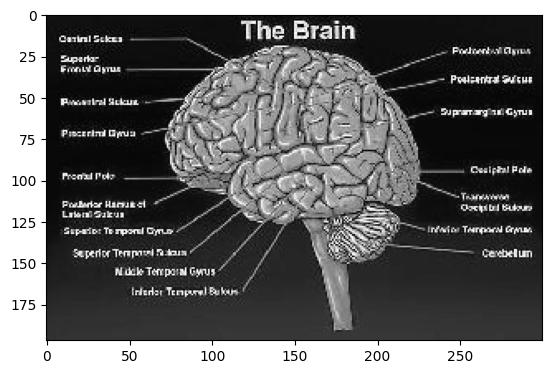

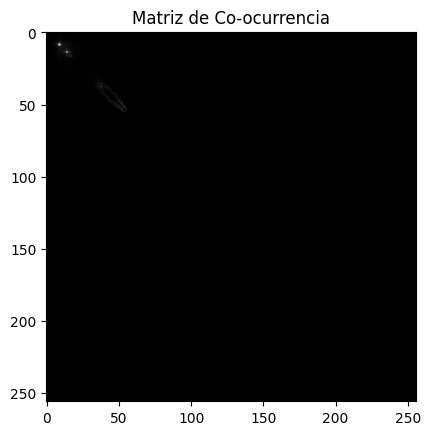

In [ ]:
import cv2
import numpy as np
from skimage.feature import graycomatrix as Co_ocurrencia

# Cargar la imagen en escala de grises
image_path = '/content/drive/MyDrive/Cursos IUPB 2024-1/Reconocimiento de patrones/Material de clase/Semana 11 y 12/Datos_Caltech101/101_ObjectCategories/brain/image_0003.jpg'  # Reemplaza con la ruta de tu imagen
image = cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image,vmin=0,vmax=255,cmap='gray')
plt.show()


# Definir la dirección y la distancia para la matriz de coocurrencia
# Dirección: [0, np.pi/4, np.pi/2, 3*np.pi/4]
# Distance = [1,2,3,...]  # Distancia: puedes ajustarlo según tu necesidad

# Calcular la matriz de coocurrencia
#glcm = Co_ocurrencia(image, [distance], [Angle], levels=256, symmetric=True, normed=True)
glcm = Co_ocurrencia(image, [1,2,3,4,5,6,7,8,9,10], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)


# Visualizar la matriz de co-ocurrencia
plt.imshow(glcm[:, :, 5, 2], cmap='gray')
plt.title('Matriz de Co-ocurrencia')
plt.show()

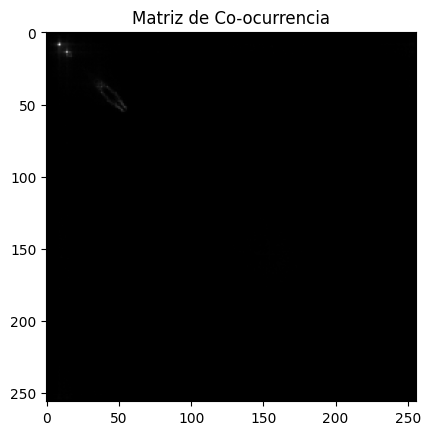

In [ ]:
# Visualizar la matriz de co-ocurrencia
plt.imshow(glcm[:, :, 9, 3], cmap='gray')
plt.title('Matriz de Co-ocurrencia')
plt.show()

Medidas de textura apartir de la Matriz de Co-ocurrencia.


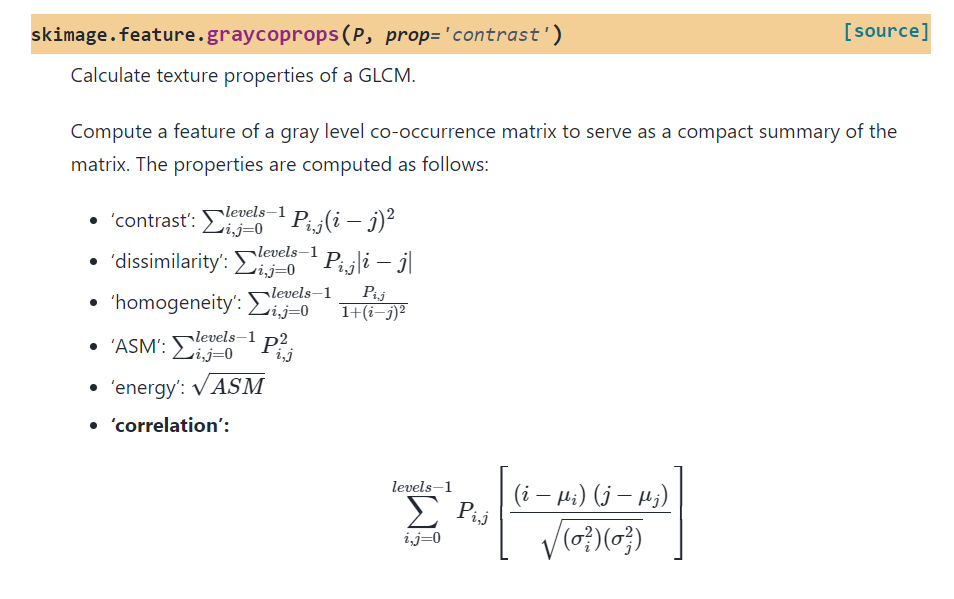

Clic [aquí](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.graycomatrix) para mayor información

Ejemplo:

In [ ]:
from skimage.feature import graycoprops
contrast = graycoprops(glcm, 'contrast')
print(np.mean(contrast))
print('')

4442.565231728697



In [ ]:
Dissimilaridad = graycoprops(glcm, 'dissimilarity')
print(np.mean(Dissimilaridad))
print('')

34.34319535511086



In [ ]:
Homogeneidad = graycoprops(glcm, 'homogeneity')
print(np.mean(Homogeneidad))
print('')

0.23302225346302055



In [ ]:
ASM = graycoprops(glcm, 'ASM')
print(np.mean(ASM))
print('')

0.0020603132935151963



In [ ]:
Energy = graycoprops(glcm, 'energy')
print(np.mean(Energy))
print('')

0.04423909095078209



#2. Descriptores de Tamura

Los descriptores de Tamura son un conjunto de características utilizadas en el procesamiento de imágenes para describir la textura de una imagen. Estos descriptores se basan en la percepción visual humana de la textura y se centran en propiedades como la coarseness (rugosidad), contrast (contraste) y directionality (direccionalidad) de la textura.

- Coarseness (Rugosidad): Mide la escala de la textura y se refiere a la cantidad de detalles gruesos presentes en la imagen. Se calcula observando la matriz de coocurrencia de niveles de gris a diferentes escalas.

- Contrast (Contraste): Evalúa cómo varían los niveles de gris en la imagen y se relaciona con la diferencia entre los valores de gris adyacentes en la matriz de la imagen.

- Directionality (Direccionalidad): Describe la orientación predominante de la textura en la imagen. Se calcula utilizando la matriz de coocurrencia de niveles de gris en diferentes direcciones.

In [ ]:
#Características de tamura

#Direccionalidad (directionality)
max_prob = np.max(glcm)
directionality = np.argwhere(glcm == max_prob)[0]

# Rugosidad (coarseness)
rugosity = np.std(glcm)

# Contraste
Contraste = np.mean(contrast)

# Imprimir los descriptores
print(f"Coarseness: {rugosity}")
print(f"Contrast: {Contraste}")
print(f"Directionality: {directionality}")

Coarseness: 0.00017664952676062996
Contrast: 4442.565231728697
Directionality: [9 9 0 0]


#3. Ejercicio

A partir del dataset del Caltech, escoger 4 categorías y montar un ejercicio de clasificación utilizando los descriptores de textura por co-ocurrencia.

#4. Para ir mas allá...

Dataset emociones: [Clic aquí](https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset)